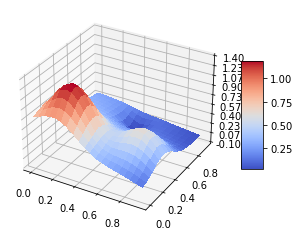

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from numpy.random import random, seed
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython import display
import pandas as pd
from scipy.stats import norm
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.preprocessing import PolynomialFeatures
fig = plt.figure()
ax = fig.gca(projection='3d')


# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [2]:
def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X


In [18]:
a = np.linspace(0,1,10)
b = np.linspace(0,1,10)

a,b = np.meshgrid(a,b)

pd.DataFrame(create_X(a,b,2))

,0,1,2,3,4,5
0,1.0,0.000000,0.0,0.000000,0.000000,0.0
1,1.0,0.111111,0.0,0.012346,0.000000,0.0
2,1.0,0.222222,0.0,0.049383,0.000000,0.0
3,1.0,0.333333,0.0,0.111111,0.000000,0.0
4,1.0,0.444444,0.0,0.197531,0.000000,0.0
...,...,...,...,...,...,...
95,1.0,0.555556,1.0,0.308642,0.555556,1.0
96,1.0,0.666667,1.0,0.444444,0.666667,1.0
97,1.0,0.777778,1.0,0.604938,0.777778,1.0
98,1.0,0.888889,1.0,0.790123,0.888889,1.0


In [3]:
def Normalize(data,mean,std,Ncol):
    for i in range(Ncol):
        if(std[i]==0):
             data[:,i]=(data[:,i]-mean[i])
        if(std[i]>0):
            data[:,i]=(data[:,i]-mean[i])/std[i]
    return data

def SVD(A):
    #Here we are using the function np.linalg.svd to find the unitary transformation U and the diagonal elements 
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    #D is the diagonal matrix
    D = np.zeros((len(U),len(VT)))
    D = np.diag(s)
    UT = np.transpose(U); V = np.transpose(VT); invD = np.linalg.inv(D)
    return np.matmul(V,np.matmul(invD,UT))

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

In [29]:
n_samples = 50

maxdegree = 2


np.random.seed(1)
x0 = np.random.rand(n_samples)
np.random.seed(2)
y0 = np.random.rand(n_samples)

x,y = np.meshgrid(x0,y0)

Train data:
0.2458707668986577
-1.7440756278242913
Test data:
0.2493479196074275
-1.8554587251447243


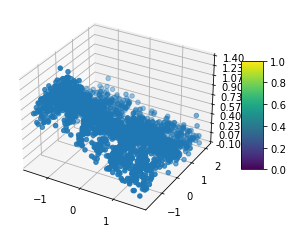

In [35]:
X = create_X(x,y,maxdegree)


noise = 0.1*np.random.randn(X.shape[0])
z = FrankeFunction(X[:,1],X[:,2]) + noise
#First we will find the mean and STD of each column
mean=np.mean(X, axis=0)
std=np.std(X, axis=0)

#Then we will redefine our designe matrix
#First we obtain the number of columns of the matrix
df=pd.DataFrame(X)
col=len(df.columns)

#Then we have found the desigen matrix and our output data Z.
X=Normalize(X,mean,std,col)


#Ofcourse we could have done df = df - df.mean(). THis will subtract the value of the mean and we can divide by the STD
#Then we have scalled our desigen matrix by subtracting the mean value and dividing by std of each column.
#Then we can split our data as follow:

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3)
#Then we can define the OLS regression method as follow:
#Our desigen matrix is singular then we must use the SVD method to avoide such a problem or we can simply use np.linalg.pinv function


OLSbeta=np.linalg.pinv(X_train.T @ X_train)@ X_train.T @ z_train
#The we have found the optimized parameter Beta, then let's do our predication 

z_Yeild= X_train@OLSbeta
z_Predic= X_test @ OLSbeta

#Then we have defined z_OLS based on our model that why we used X_Test
#Then let's find the MSE and R^2
print("Train data:")
print(MSE(z_train,z_Yeild))
print(R2(z_train,z_Yeild))
print("Test data:")
print(MSE(z_test,z_Predic))
print(R2(z_test,z_Predic))

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.scatter3D(X[:,1],X[:,2], z, cmap=cm.coolwarm)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [36]:
def bootstrap_test(data, datapoints):
    t = np.zeros(datapoints)
    n = len(data)
    # non-parametric bootstrap         
    for i in range(datapoints):
        t[i] = np.mean(data[np.random.randint(0,n,n)])
    # analysis    
    print("Bootstrap Statistics :")
    print("original           bias      std. error")
    print("%8g %8g %14g %15g" % (np.mean(data), np.std(data),np.mean(t),np.std(t)))
    return t

In [43]:
t=bootstrap_test(X_train,100)

Bootstrap Statistics :
original           bias      std. error
-0.0081368 0.815359    -0.00588188       0.0107974


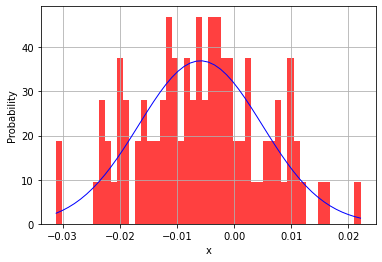

In [44]:
# the histogram of the bootstrapped data (normalized data if density = True)
n, binsboot, patches = plt.hist(t, 50, density=True, facecolor='red', alpha=0.75)
# add a 'best fit' line  
y = norm.pdf(binsboot, np.mean(t), np.std(t))
lt = plt.plot(binsboot, y, 'b', linewidth=1)
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

In [45]:
#This a try to understand our model much better:
n_boostraps = 10
degree=5
model=make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
# The following (m x n_bootstraps) matrix holds the column vectors y_pred
# for each bootstrap iteration.
z_pred = np.empty((z_test.shape[0], n_boostraps))
for i in range(n_boostraps):
    X_, z_ = resample(X_train, z_train)

    # Evaluate the new model on the same test data each time.
    z_pred[:, i] = model.fit(X_, z_).predict(X_test).ravel()

print(z_pred.shape)    
print(z_test.shape)


# Note: Expectations and variances taken w.r.t. different training
# data sets, hence the axis=1. Subsequent means are taken across the test data
# set in order to obtain a total value, but before this we have error/bias/variance
# calculated per data point in the test set.
# Note 2: The use of keepdims=True is important in the calculation of bias as this 
# maintains the column vector form. Dropping this yields very unexpected results.

z_t = z_test.reshape(len(z_test),1)
    
error= np.mean( np.mean((z_t - z_pred)**2, axis=1, keepdims=True)) 
bias = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
variance = np.mean( np.var(z_pred, axis=1, keepdims=True) )
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

(750, 10)
(750,)
Error: 0.011820373390607122
Bias^2: 0.1513667583946518
Var: 0.00016997418808739972
0.011820373390607122 >= 0.1513667583946518 + 0.00016997418808739972 = 0.1515367325827392


In [104]:
def poly_design_matrix(X, deg):
    
    N = X.shape[0]
    l = int((deg+1)*(deg+2)/2) # Number of elements in beta
    X_new = np.ones((N,l))

    x = X[:,0]
    y = X[:,1]
        
    for i in range(1,deg+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X_new[:,q+k] = (x**(i-k))*(y**k)
    
    return X_new


(10000, 1)
Degree of polynomial:   1
Degree of polynomial:   2
Degree of polynomial:   3
Degree of polynomial:   4
Degree of polynomial:   5
Degree of polynomial:   6
Degree of polynomial:   7
Degree of polynomial:   8
Degree of polynomial:   9
Degree of polynomial:  10
Degree of polynomial:  11


<ipython-input-106-48a32729056d>:88: RuntimeWarning: divide by zero encountered in log10
  plt.plot(polynomial, np.log10(np.mean(trainingerror,axis=1)), label='Training Error')
<ipython-input-106-48a32729056d>:89: RuntimeWarning: divide by zero encountered in log10
  plt.plot(polynomial, np.log10(np.mean(testerror,axis=1)), label='Test Error')


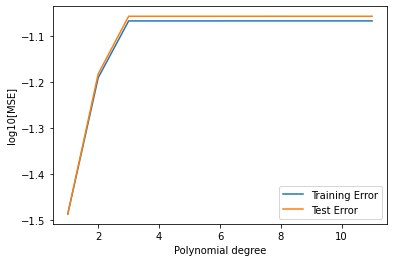

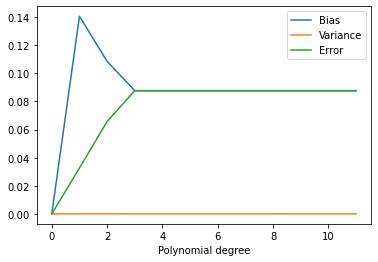

In [106]:
n_samples = 100

np.random.seed(1)
x0 = np.random.rand(n_samples)
np.random.seed(2)
y0 = np.random.rand(n_samples)

x,y = np.meshgrid(x0,y0)

Maxpolydegree = 12
trials = 50

print((np.ravel(x).reshape(-1,1)).shape)

testerror = np.zeros((Maxpolydegree,trials))
trainingerror = np.zeros((Maxpolydegree,trials))
polynomial = np.zeros(Maxpolydegree)


bias = np.zeros(Maxpolydegree)
variance = np.zeros(Maxpolydegree)
error = np.zeros(Maxpolydegree)

X = np.concatenate((np.ravel(x).reshape(-1,1),np.ravel(y).reshape(-1,1)),axis=1)

noise = 0.1*np.random.randn(X.shape[0])
z = FrankeFunction(X[:,0],X[:,1]) + noise


X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 50)


for polydegree in range(1, Maxpolydegree):
    
    X_train = poly_design_matrix(X_train,polydegree)
    X_test = poly_design_matrix(X_test,polydegree)
    
    #noise = 0.1*np.random.randn(X.shape[0])
    #z = FrankeFunction(X[:,1],X[:,2]) + noise
    #First we will find the mean and STD of each column
    #mean=np.mean(X, axis=0)
    #std=np.std(X, axis=0)

    #Then we will redefine our designe matrix
    #First we obtain the number of columns of the matrix
    #df=pd.DataFrame(X)
    #col=len(df.columns)

    #Then we have found the desigen matrix and our output data Z.
    #X=Normalize(X,mean,std,col)


    #Ofcourse we could have done df = df - df.mean(). THis will subtract the value of the mean and we can divide by the STD
    #Then we have scalled our desigen matrix by subtracting the mean value and dividing by std of each column.
    #Then we can split our data as follow:

    
    model= LinearRegression(fit_intercept=False)
    
    polynomial[polydegree] = polydegree
    
    z_test_pred = np.zeros((z_test.shape[0], trials))
    z_train_pred = np.zeros((z_train.shape[0], trials))
    
    for samples in range(trials):
        
        X_, z_ = resample(X_train, z_train)

        # Evaluate the new model on the same test data each time.
        model.fit(X_,z_)
        z_test_pred[:, samples] = model.predict(X_test).ravel()
        z_train_pred[:, samples] = model.predict(X_train).ravel()
        
        testerror[polydegree, samples] = mean_squared_error(z_test, z_test_pred[:,samples])
        trainingerror[polydegree, samples] = mean_squared_error(z_train, z_train_pred[:,samples]) 

    print("Degree of polynomial: %3d"% polynomial[polydegree])
   # print("Mean squared error on training data: %.8f" % trainingerror[polydegree])
   # print("Mean squared error on test data: %.8f" % testerror[polydegree])
    
    z_t = z_test.reshape(len(z_test),1)
    
    error[polydegree] = np.mean( np.mean((z_t - z_test_pred)**2, axis=1, keepdims=True)) 
    bias[polydegree] = np.mean( (z_test - np.mean(z_test_pred, axis=1, keepdims=True))**2 )
    variance[polydegree] = np.mean( np.var(z_test_pred, axis=1, keepdims=True) )
    
    
plt.plot(polynomial, np.log10(np.mean(trainingerror,axis=1)), label='Training Error')
plt.plot(polynomial, np.log10(np.mean(testerror,axis=1)), label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()


plt.plot(polynomial, bias, label='Bias')
plt.plot(polynomial, variance, label='Variance')
plt.plot(polynomial, error, label='Error')
plt.xlabel('Polynomial degree')
plt.legend()
plt.show()
